In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
login_times = pd.read_json('/content/sample_data/logins.json')

In [32]:
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [33]:
login_times.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [34]:
login_times.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [35]:
login_times[login_times['login_time']=='1970-02-12 11:16:53']

,login_time
29774,1970-02-12 11:16:53
29790,1970-02-12 11:16:53
29797,1970-02-12 11:16:53


In [36]:
login_times.groupby(['login_time'])['login_time'].count().nlargest(10)

login_time
1970-01-06 21:45:52    3
1970-01-09 01:31:25    3
1970-02-12 11:16:53    3
1970-02-24 23:09:57    3
1970-03-14 17:45:52    3
1970-03-17 01:01:39    3
1970-03-29 03:24:57    3
1970-04-04 01:17:40    3
1970-04-12 04:03:15    3
1970-01-02 10:59:52    2
Name: login_time, dtype: int64

In [40]:

login_times.set_index('login_time', inplace=True)
login_times['count'] = 1

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


In [41]:
login_times.sort_index(inplace=True)


In [43]:
login_times_agg = login_times.resample("15min").sum()

In [45]:
login_times_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [49]:
login_times_agg.tail()

,count
login_time,
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2
1970-04-13 18:30:00,7
1970-04-13 18:45:00,6


In [46]:
login_times_agg['count'].sum()

93142

In [47]:
login_times_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


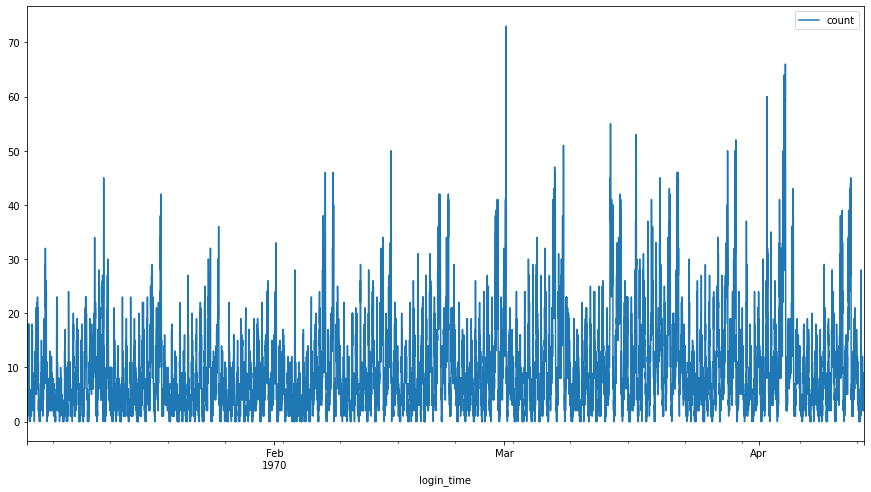

In [60]:
login_times_agg.plot(figsize=(15, 8))
plt.show()

From the above graph we can see that demand is rising at constant interval , to visualize it lets smoothen the graph by day , meaning we will put a rolling window of (24*60/15 =>96)

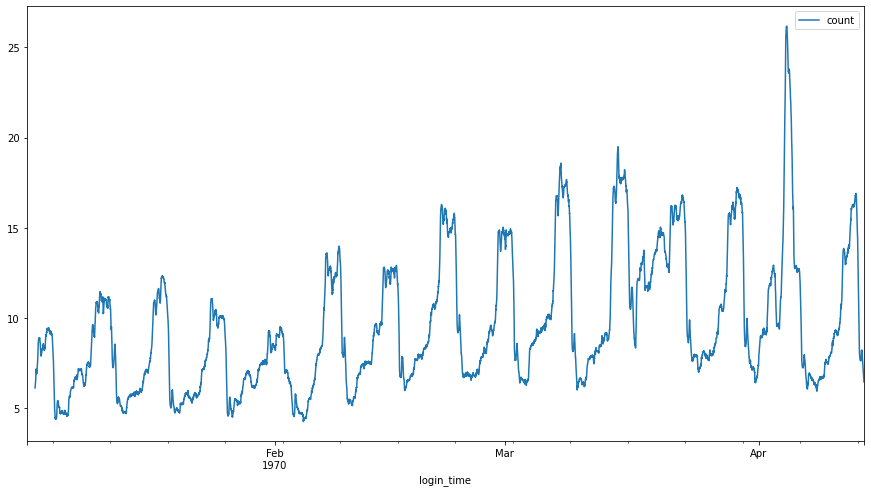

In [61]:
login_times_agg.rolling(window=96).mean().plot(figsize=(15, 8))
plt.show()

Lets look at one one particular month to understand the demand variation

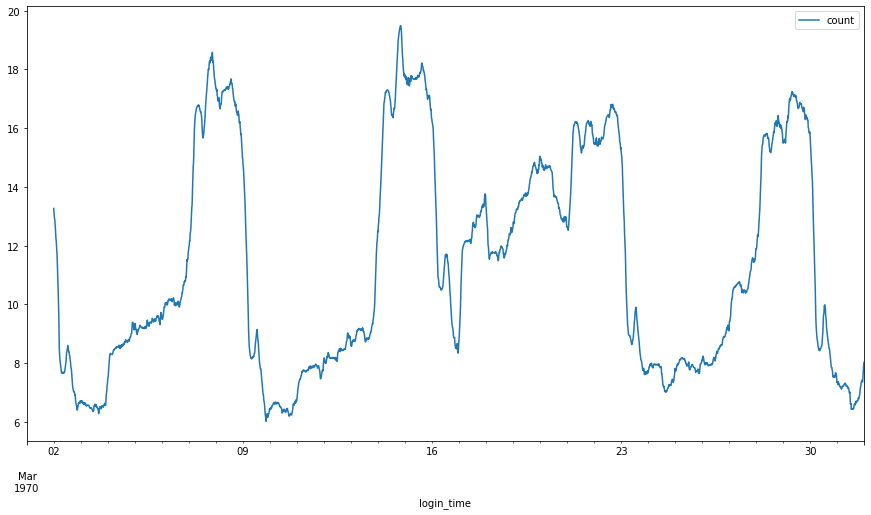

In [63]:
login_times_agg.loc['1970-03'].rolling(window=96).mean().plot(figsize=(15, 8))

In [74]:
import datetime
datetime.datetime(1970, 3, 9).weekday()

0

In [75]:
datetime.datetime(1970, 3, 8).weekday()

6

The above data shows that demand increases at the time of weekend and then drops as weekdays starts

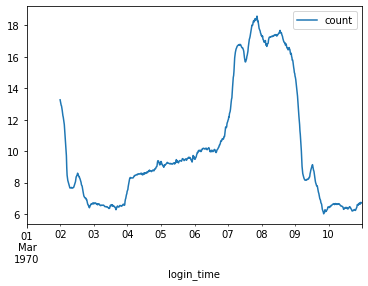

In [76]:
login_times_agg.loc['1970-03-01':'1970-03-10'].rolling(window=96).mean().plot()
plt.show()

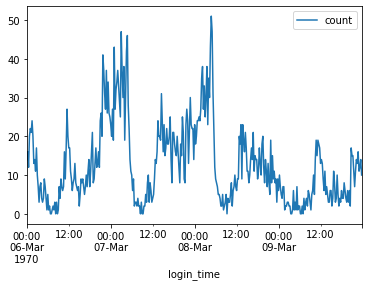

In [80]:
login_times_agg.loc['1970-03-06':'1970-03-09'].plot()
plt.show()

on 7th and 8th we have more sales (saturday and sunday)

lets analyse weekdays

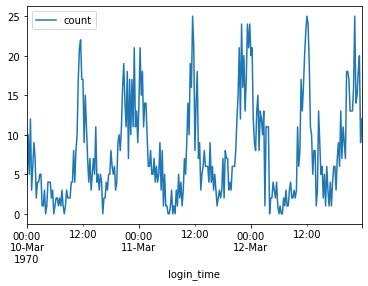

In [81]:
login_times_agg.loc['1970-03-10':'1970-03-12'].plot()
plt.show()

We are able to come up with two conclusions
1. demand is more on weekends
2. both on weekends and weekdays demand is high during midnight and mid of the day